# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

https://github.com/saingersoll/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [1]:
### ===== FINAL CODE =====

## Import libraries and functions

In [2]:
# import libraries and functions 
import os
import numpy as np
import pandas as pd

import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
import rasterio
from shapely.geometry import Point
from shapely.geometry import box

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [3]:
# 1
lulc = rioxr.open_rasterio(os.path.join(os.getcwd(), 'data', 'land_cover.tif')) 

# confirming the dataset loaded properly by viewing xarray.DataArray
lulc

<xarray.DataArray (band: 1, y: 3000, x: 3000)>
[9000000 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

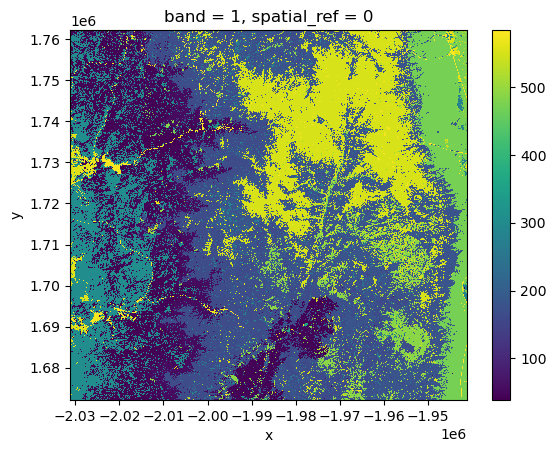

In [5]:
# confirming the dataset loaded properly by plot
lulc.plot()

In [6]:
# 2
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# confirming the dataset loaded properly
ca.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   REGION    1 non-null      object  
 1   DIVISION  1 non-null      object  
 2   STATEFP   1 non-null      object  
 3   STATENS   1 non-null      object  
 4   GEOID     1 non-null      object  
 5   STUSPS    1 non-null      object  
 6   NAME      1 non-null      object  
 7   LSAD      1 non-null      object  
 8   MTFCC     1 non-null      object  
 9   FUNCSTAT  1 non-null      object  
 10  ALAND     1 non-null      int64   
 11  AWATER    1 non-null      int64   
 12  INTPTLAT  1 non-null      object  
 13  INTPTLON  1 non-null      object  
 14  geometry  1 non-null      geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 248.0+ bytes


<AxesSubplot:>

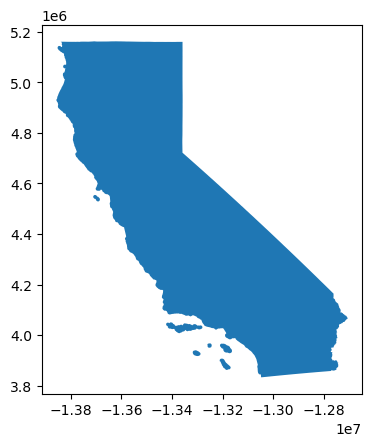

In [7]:
# confirming the dataset loaded properly by plot
ca.plot()

## LULC Bounding Box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

In [16]:
bbox = gpd.GeoDataFrame(geometry = [box(*lulc.rio.bounds())],
                       crs = 'epsg:4326')

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()` & rioxarray notebook](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [9]:
# List of verticies of our region of interest (roi) box
point = [[-118.292399, 36.57855]]


# creating a geodataframe with roi with crs of choice
mt_whitney = gpd.GeoDataFrame(geometry = [Point(point)],
                             crs = "epsg:4326")

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [18]:
ca = ca.to_crs(lulc.rio.crs)

mt_whitney = mt_whitney.to_crs(lulc.rio.crs)

In [11]:
# print T/F statement about crs to check

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

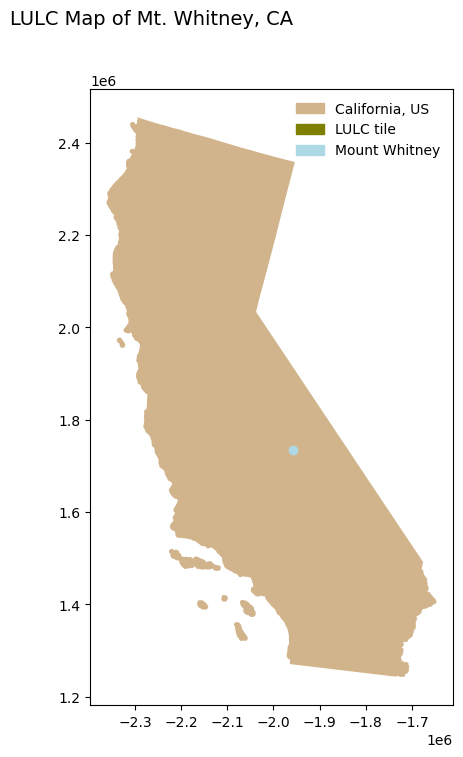

In [13]:
import matplotlib.path as mpath

#marker_style = dict(linestyle=':', color='0.8', markersize=10,
   #                 markerfacecolor="navy:lightblue", markeredgecolor="navy:lightblue")
    
    #ax.plot([mt_whitney], marker=marker, **marker_style)

star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
cut_star = mpath.Path(
    vertices=np.concatenate([circle.vertices, star.vertices[::-1, ...]]),
    codes=np.concatenate([circle.codes, star.codes]))

#marker = {'cut_star': cut_star}

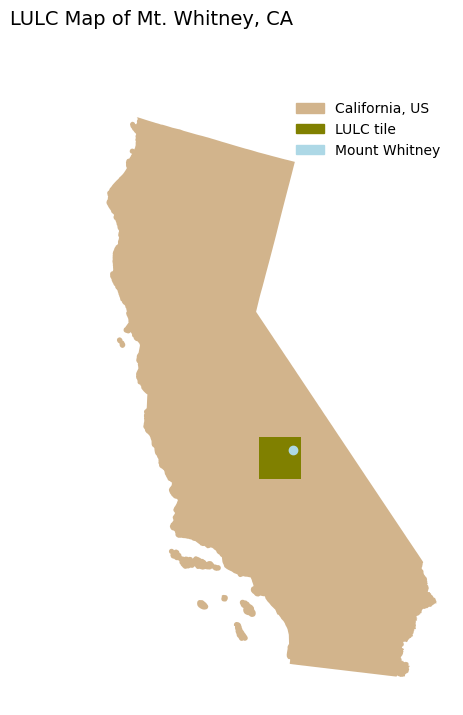

In [19]:
size = 8
aspect = lulc.rio.width/lulc.rio.height

fig, ax = plt.subplots()
fig.set_size_inches(size, size*aspect)
fig.suptitle('LULC Map of Mt. Whitney, CA', fontsize=14)
fig.subplots_adjust(left=0.4)
plt.axis('off')

ca.plot(ax = ax,
        color = 'tan',
       aspect = 1)
ca_patch = mpatches.Patch(color = 'tan',
                          label = 'California, US')

bbox.plot(ax = ax,
         color = 'olive')
lulc_patch = mpatches.Patch(color = 'olive',
                           label = 'LULC tile')

mt_whitney.plot(ax = ax,
               color = 'lightblue',
               aspect = 1)
mt_whitney_patch = mpatches.Patch(color = 'lightblue',
                                 label = 'Mount Whitney')

ax.legend(handles = [ca_patch, lulc_patch, mt_whitney_patch], frameon = False, loc = 'upper right')

plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
